In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
import numpy as np
import tensorflow as tf

## Have a look at the dataset
It consists of the files: ratings.csv, books.csv, book_tags.csv, and tags.csv.
\\ ratings.csv contains all users’s ratings of the books (a total of 6 Million ratings, for 10,000 books, from 53,424 users).
\\ books.csv contains information on the books such as author, average rating, etc. 
\\ book_tags contains all tag_ids users have assigned to that books and corresponding tag_counts, while tags.csv contains the tag_names corresponding to the tag_ids. These two files are linked by the books’ ids.

In [2]:
# Products
dtf_products = pd.read_csv("archive/books.csv")

In [3]:
print(dtf_products.isnull().values.any(), dtf_products.isnull().sum().sum(), dtf_products['id'].isnull().sum())

True 2975 0


In [4]:
dtf_products

id  book_id  best_book_id   work_id  books_count        isbn  \
0         1  2767052       2767052   2792775          272   439023483   
1         2        3             3   4640799          491   439554934   
2         3    41865         41865   3212258          226   316015849   
3         4     2657          2657   3275794          487    61120081   
4         5     4671          4671    245494         1356   743273567   
...     ...      ...           ...       ...          ...         ...   
9995   9996  7130616       7130616   7392860           19   441019455   
9996   9997   208324        208324   1084709           19  067973371X   
9997   9998    77431         77431   2393986           60  039330762X   
9998   9999  8565083       8565083  13433613            7    61711527   
9999  10000     8914          8914     11817           31   375700455   

            isbn13                      authors  original_publication_year  \
0     9.780000e+12              Suzanne Collins                     2008.0   
1     9.780000e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2     9.780000e+12              Stephenie Meyer                     2005.0   
3     9.780000e+12                   Harper Lee                     1960.0   
4     9.780000e+12          F. Scott Fitzgerald                     1925.0   
...            ...                          ...                        ...   
9995  9.780000e+12                Ilona Andrews                     2010.0   
9996  9.780000e+12               Robert A. Caro                     1990.0   
9997  9.780000e+12              Patrick O'Brian                     1977.0   
9998  9.780000e+12              Peggy Orenstein                     2011.0   
9999  9.780000e+12                  John Keegan                     1998.0   

                                         original_title  ... ratings_count  \
0                                      The Hunger Games  ...       4780653   
1              Harry Potter and the Philosopher's Stone  ...       4602479   
2                                              Twilight  ...       3866839   
3                                 To Kill a Mockingbird  ...       3198671   
4                                      The Great Gatsby  ...       2683664   
...                                                 ...  ...           ...   
9995                                         Bayou Moon  ...         17204   
9996                                   Means of Ascent   ...         12582   
9997                              The Mauritius Command  ...          9421   
9998  Cinderella Ate My Daughter: Dispatches from th...  ...         11279   
9999                                The First World War  ...          9162   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0               4942365                   155254      66715     127936   
1               4800065                    75867      75504     101676   
2               3916824                    95009     456191     436802   
3               3340896                    72586      60427     117415   
4               2773745                    51992      86236     197621   
...                 ...                      ...        ...        ...   
9995              18856                     1180        105        575   
9996              12952                      395        303        551   
9997              10733                      374         11        111   
9998              11994                     1988        275       1002   
9999               9700                      364        117        345   

      ratings_3  ratings_4  ratings_5  \
0        560092    1481305    2706317   
1        455024    1156318    3011543   
2        793319     875073    1355439   
3        446835    1001952    1714267   
4        606158     936012     947718   
...         ...        ...        ...   
9995       3538       7860       6778   
9996       1737       3389       6972   


In [5]:
# Users
dtf_users = pd.read_csv("archive/ratings.csv")
dtf_users

user_id  book_id  rating
0              1      258       5
1              2     4081       4
2              2      260       5
3              2     9296       5
4              2     2318       3
...          ...      ...     ...
5976474    49925      510       5
5976475    49925      528       4
5976476    49925      722       4
5976477    49925      949       5
5976478    49925     1023       4

[5976479 rows x 3 columns]

## cleaning data

In [6]:
dtf_products.drop_duplicates(subset='original_title',keep=False,inplace=True)
dtf_products

id   book_id  best_book_id   work_id  books_count        isbn  \
0         1   2767052       2767052   2792775          272   439023483   
1         2         3             3   4640799          491   439554934   
3         4      2657          2657   3275794          487    61120081   
4         5      4671          4671    245494         1356   743273567   
5         6  11870085      11870085  16827462          226   525478817   
...     ...       ...           ...       ...          ...         ...   
9995   9996   7130616       7130616   7392860           19   441019455   
9996   9997    208324        208324   1084709           19  067973371X   
9997   9998     77431         77431   2393986           60  039330762X   
9998   9999   8565083       8565083  13433613            7    61711527   
9999  10000      8914          8914     11817           31   375700455   

            isbn13                      authors  original_publication_year  \
0     9.780000e+12              Suzanne Collins                     2008.0   
1     9.780000e+12  J.K. Rowling, Mary GrandPré                     1997.0   
3     9.780000e+12                   Harper Lee                     1960.0   
4     9.780000e+12          F. Scott Fitzgerald                     1925.0   
5     9.780000e+12                   John Green                     2012.0   
...            ...                          ...                        ...   
9995  9.780000e+12                Ilona Andrews                     2010.0   
9996  9.780000e+12               Robert A. Caro                     1990.0   
9997  9.780000e+12              Patrick O'Brian                     1977.0   
9998  9.780000e+12              Peggy Orenstein                     2011.0   
9999  9.780000e+12                  John Keegan                     1998.0   

                                         original_title  ... ratings_count  \
0                                      The Hunger Games  ...       4780653   
1              Harry Potter and the Philosopher's Stone  ...       4602479   
3                                 To Kill a Mockingbird  ...       3198671   
4                                      The Great Gatsby  ...       2683664   
5                                The Fault in Our Stars  ...       2346404   
...                                                 ...  ...           ...   
9995                                         Bayou Moon  ...         17204   
9996                                   Means of Ascent   ...         12582   
9997                              The Mauritius Command  ...          9421   
9998  Cinderella Ate My Daughter: Dispatches from th...  ...         11279   
9999                                The First World War  ...          9162   

     work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0               4942365                   155254      66715     127936   
1               4800065                    75867      75504     101676   
3               3340896                    72586      60427     117415   
4               2773745                    51992      86236     197621   
5               2478609                   140739      47994      92723   
...                 ...                      ...        ...        ...   
9995              18856                     1180        105        575   
9996              12952                      395        303        551   
9997              10733                      374         11        111   
9998              11994                     1988        275       1002   
9999               9700                      364        117        345   

      ratings_3  ratings_4  ratings_5  \
0        560092    1481305    2706317   
1        455024    1156318    3011543   
3        446835    1001952    1714267   
4        606158     936012     947718   
5        327550     698471    1311871   
...         ...        ...        ...   
9995       3538       7860       6778   
9996       1737       3389   

**849 rows removed**

In [7]:
print(dtf_users.isnull().sum().sum())
# drop duplicates
dtf_users.drop_duplicates(subset =["user_id","book_id"], 
                     keep = False, inplace = True) 
dtf_users

0


user_id  book_id  rating
0              1      258       5
1              2     4081       4
2              2      260       5
3              2     9296       5
4              2     2318       3
...          ...      ...     ...
5976474    49925      510       5
5976475    49925      528       4
5976476    49925      722       4
5976477    49925      949       5
5976478    49925     1023       4

[5976479 rows x 3 columns]

**no rows removed**

In [8]:
dtf_users["user_id"].min(), dtf_users["user_id"].max(), dtf_users["book_id"].min(), dtf_users["book_id"].max(), dtf_products["book_id"].min(), dtf_products["book_id"].max()

(1, 53424, 1, 10000, 1, 33288638)

## most rated books

In [9]:
import plotly_express as px
top_rated = dtf_products.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:25]
info = ['title','small_image_url']
displ=(tf_top_rated[info])
displ.set_index('title', inplace=True)
fig = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()

In [10]:
from IPython.display import Image, HTML
def path_to_image_html(path):
    '''
     This function essentially convert the image url to 
     '<img src="'+ path + '"/>' format. And one can put any
     formatting adjustments to control the height, aspect ratio, size etc.
     within as in the below example. 
    '''

    return '<img src="'+ path + '""/>'

HTML(displ.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

## most popular books

In [11]:
top_popular = dtf_products.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
info =['title','small_image_url']
pop50=(top_popular[info])
pop50=pop50.set_index('title')
fig = px.bar(fifty_top_popular, x="ratings_count", y="original_title", title='Top Popular Books', orientation='h', color='original_title',
             width=1500, height=700)
fig.show()

In [12]:
HTML(pop50.to_html(escape=False ,formatters=dict(small_image_url=path_to_image_html),justify='center'))

In [13]:
top_fifty_authors = top_rated[:50]
top_fifty_authors['authors'].unique()

array(['Bill Watterson', 'Brandon Sanderson', 'Francine Rivers',
       'J.K. Rowling', 'Sarah J. Maas',
       'The Church of Jesus Christ of Latter-day Saints', 'Anonymous',
       'J.K. Rowling, Mary GrandPré',
       'Daniel Abraham, George R.R. Martin, Tommy Patterson',
       'Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth',
       'George R.R. Martin', 'Hafez', 'James E. Talmage', 'Eiichirō Oda',
       'Angie Thomas', 'Leigh Bardugo', 'Bill Watterson, G.B. Trudeau',
       'Richelle Mead', 'Gordon B. Hinckley',
       'Alisa Kwitney, Neil Gaiman', 'John   Williams',
       'Francine Rivers, Richard Ferrone', 'Sherrilyn Kenyon',
       'J.R.R. Tolkien', 'Cassandra Clare',
       "Neil Gaiman, Marc Hempel, Richard Case, D'Israeli, Teddy Kristiansen, Glyn Dillon, Charles Vess, Dean Ormston, Kevin Nowlan, Todd Klei

In [14]:
top_author_counts = dtf_products['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

## most common rating values

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

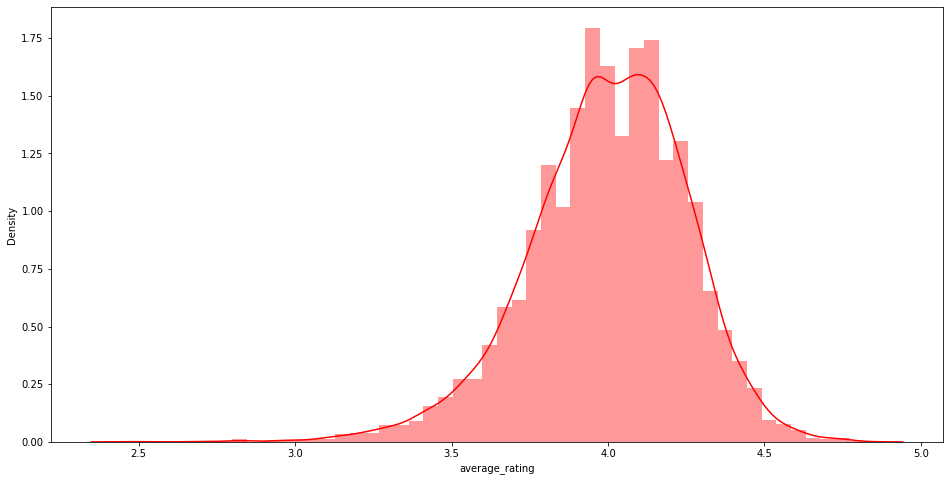

In [15]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.distplot(a=dtf_products['average_rating'], kde=True, color='r')

<AxesSubplot:xlabel='average_rating', ylabel='Count'>

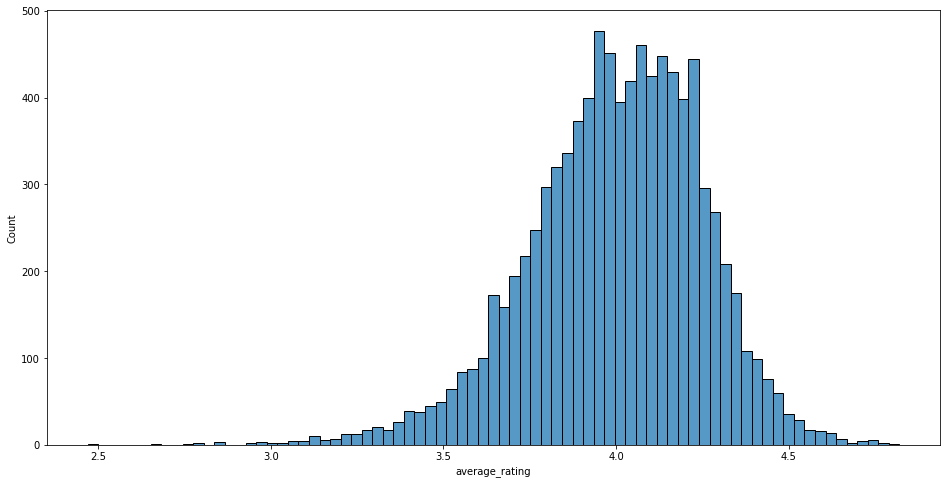

In [16]:
plt.figure(figsize=(16,8))
sns.histplot(data=dtf_products ,x="average_rating")

**most rating values are between 3.5 to 4.5**


<AxesSubplot:xlabel='rating', ylabel='Density'>

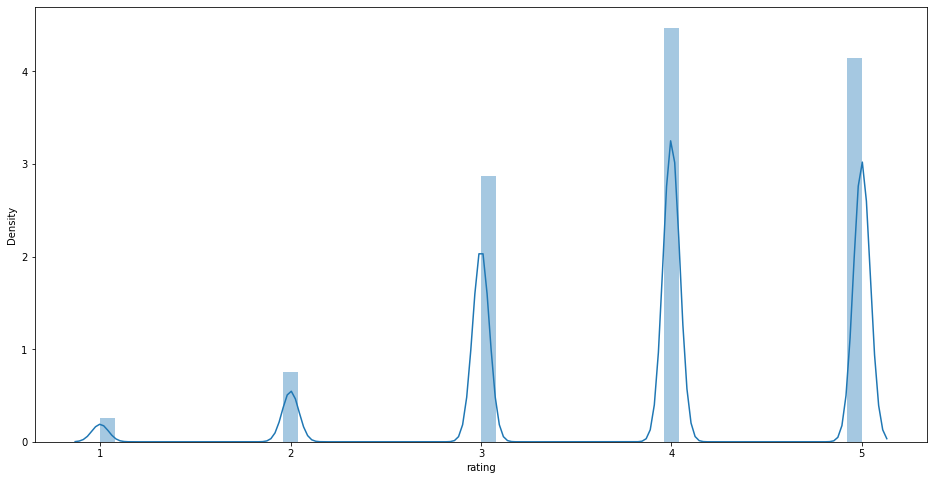

In [17]:
plt.figure(figsize=(16,8))
sns.distplot(a=dtf_users['rating'], kde=True)

<AxesSubplot:xlabel='rating', ylabel='Count'>

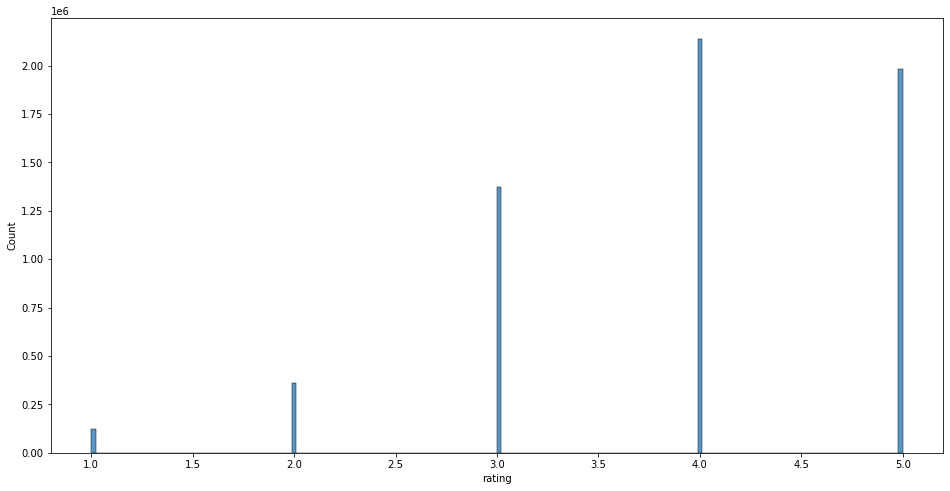

In [18]:
plt.figure(figsize=(16,8))
sns.histplot(data=dtf_users ,x="rating")

In [19]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
dtf_users['rating'].value_counts().iplot(kind='bar',
                                         xTitle='Rating',
                                         yTitle='Counts',
                                         title='Rating Distribution',
                                         color='red')

**It’s not balanced.
Most of the users give ratings 4 and 5**


## Distribution of number of ratings given by each user

In [60]:
dtf_users['user_id'].value_counts().iplot(kind='bar',
                                         xTitle='user_id',
                                         yTitle='Counts of ratings',
                                         title='Ratings per user')

In [57]:
dtf_users['user_id'].max()

53424

In [39]:
# users = dtf_users['user_id']
# users_rating_counts = {}
# for i in users:
#     if i not in users_rating_counts.keys():
#         users_rating_counts[i] = len(list(dtf_users[dtf_users['user_id'] == i]))
# #         print(i, users_rating_counts[i])

In [58]:
# import matplotlib.pyplot as plt

# # dictionary = {1: 27, 34: 1, 3: 72, 4: 62, 5: 33, 6: 36, 7: 20, 8: 12, 9: 9, 10: 6, 11: 5, 
# #               12: 8, 2: 74, 14: 4, 15: 3, 16: 1, 17: 1, 18: 1, 19: 1, 21: 1, 27: 2}
# plt.bar(list(users_rating_counts.keys()), users_rating_counts.values(), 1000, color='g')
# plt.show()

In [59]:
# plt.figure(figsize=(10,10))
# plt.hist(dtf_users['user_id'], edgecolor='black')

In [25]:
users= dtf_users.groupby('user_id').count()
users

book_id  rating
user_id                 
1            117     117
2             65      65
3             91      91
4            134     134
5            100     100
...          ...     ...
53420        110     110
53421        110     110
53422        130     130
53423         77      77
53424        133     133

[53424 rows x 2 columns]

In [26]:
users['rating'].max()

200

<AxesSubplot:xlabel='rating', ylabel='Count'>

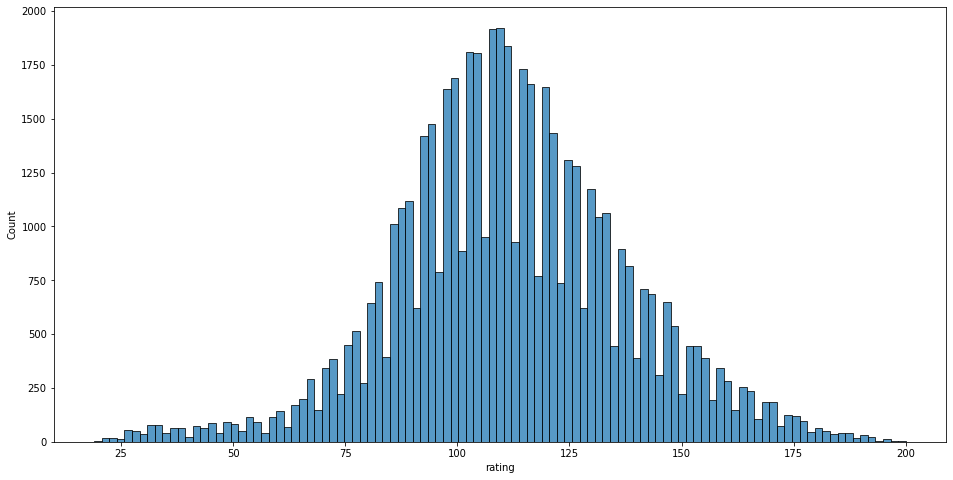

In [22]:
plt.figure(figsize=(16,8))
sns.histplot(data=users ,x="rating")

## number of ratings for each book

In [42]:
no_of_ratings_per_book=dtf_users.groupby('book_id').count()
no_of_ratings_per_book['rating']

book_id
1        22806
2        21850
3        16931
4        19088
5        16604
         ...  
9996       141
9997        93
9998       102
9999       130
10000      111
Name: rating, Length: 10000, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='Count'>

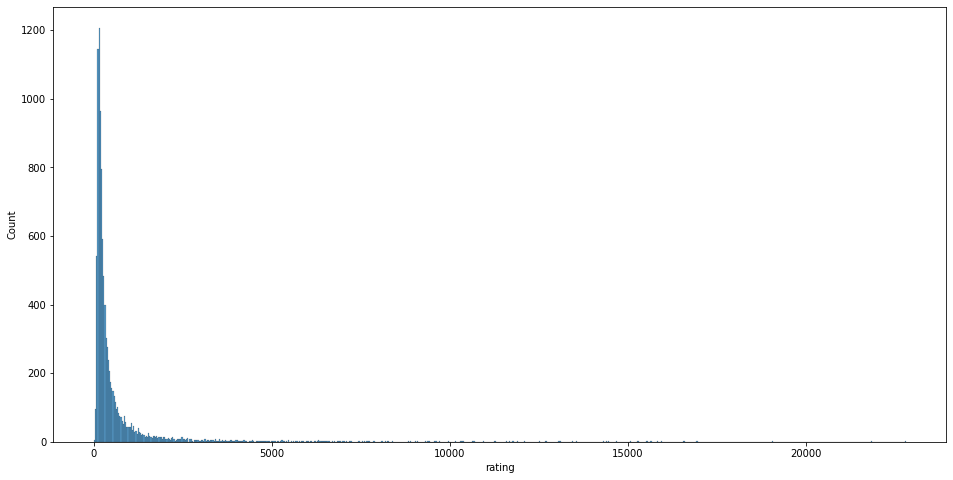

In [43]:
plt.figure(figsize=(16,8))
sns.histplot(data=no_of_ratings_per_book ,x="rating")

<AxesSubplot:xlabel='rating', ylabel='Density'>

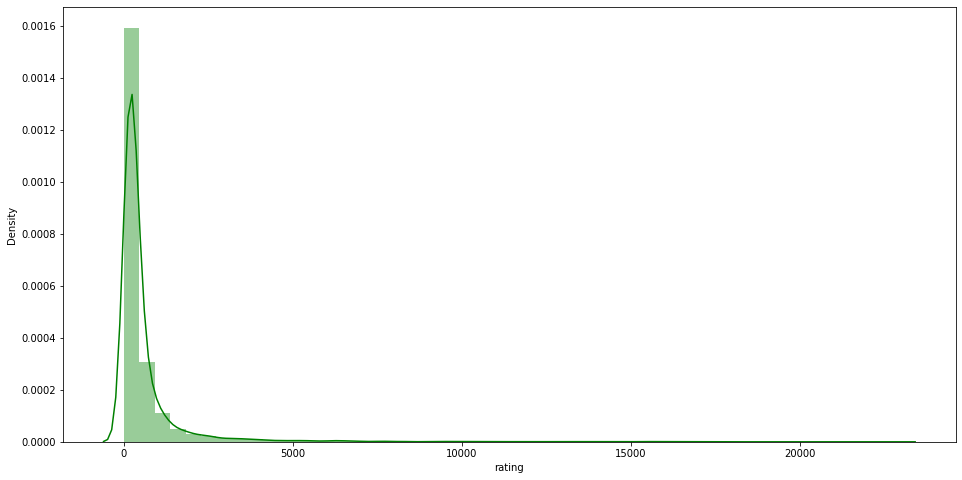

In [44]:
plt.figure(figsize=(16,8))
sns.distplot(a=no_of_ratings_per_book['rating'], color='g')

**most of books got between 8 to 2500 ratings**

In [45]:
no_of_ratings_per_book['rating'].min(), no_of_ratings_per_book['rating'].mean(), no_of_ratings_per_book['rating'].max()

(8, 597.6479, 22806)

It is seen that most books have count of ratings greater than 80. That is alot of audience.
It is seen that average count of ratings is 597.6479.

## Higly rated authors

In [51]:
info=['authors', 'average_rating']
top_authors=top_rated[info]
top_authors=top_authors.head(15)
fig = px.bar(top_authors, x='authors', y='average_rating', color ='average_rating')
fig.show()

**Bill Waterson is on the top with a whopping rating of 4.82**

## Top author(frequencies of books)

In [67]:
top_author_counts = dtf_products['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()

## the genres of the books

In [52]:
book_tags = pd.read_csv('archive/book_tags.csv')
book_tags

goodreads_book_id  tag_id   count
0                       1   30574  167697
1                       1   11305   37174
2                       1   11557   34173
3                       1    8717   12986
4                       1   33114   12716
...                   ...     ...     ...
999907           33288638   21303       7
999908           33288638   17271       7
999909           33288638    1126       7
999910           33288638   11478       7
999911           33288638   27939       7

[999912 rows x 3 columns]

In [53]:
tags = pd.read_csv('archive/tags.csv')
tags

tag_id    tag_name
0           0           -
1           1        --1-
2           2       --10-
3           3       --12-
4           4      --122-
...       ...         ...
34247   34247   Ｃhildrens
34248   34248   Ｆａｖｏｒｉｔｅｓ
34249   34249       Ｍａｎｇａ
34250   34250      ＳＥＲＩＥＳ
34251   34251  ｆａｖｏｕｒｉｔｅｓ

[34252 rows x 2 columns]

In [54]:
tags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
tags

tag_id    tag_name
0           0           -
1           1        --1-
2           2       --10-
3           3       --12-
4           4      --122-
...       ...         ...
34247   34247   Ｃhildrens
34248   34248   Ｆａｖｏｒｉｔｅｓ
34249   34249       Ｍａｎｇａ
34250   34250      ＳＥＲＩＥＳ
34251   34251  ｆａｖｏｕｒｉｔｅｓ

[34252 rows x 2 columns]

In [55]:
book_tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
book_tags

goodreads_book_id  tag_id   count
0                       1   30574  167697
1                       1   11305   37174
2                       1   11557   34173
3                       1    8717   12986
4                       1   33114   12716
...                   ...     ...     ...
999907           33288638   21303       7
999908           33288638   17271       7
999909           33288638    1126       7
999910           33288638   11478       7
999911           33288638   27939       7

[999896 rows x 3 columns]

** removed 16 duplicate rows**

In [56]:
tags_join_DF = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join_DF

goodreads_book_id  tag_id   count     tag_name
0                       1   30574  167697      to-read
1                       2   30574   24549      to-read
2                       3   30574  496107      to-read
3                       5   30574   11909      to-read
4                       6   30574     298      to-read
...                   ...     ...     ...          ...
999891           31538635   14690       6     hogwarts
999892           32848471   16149      21     jan-2017
999893           33288638   27821       9   single-mom
999894           33288638   11478       7  fave-author
999895           33288638   27939       7     slowburn

[999896 rows x 4 columns]

In [57]:
tags_join_DF[tags_join_DF["tag_id"] == 34247]

goodreads_book_id  tag_id  count   tag_name
868632               6319   34247     66  Ｃhildrens
868633              17061   34247     89  Ｃhildrens
868634              39988   34247    135  Ｃhildrens
868635             122967   34247     23  Ｃhildrens
868636             348573   34247     40  Ｃhildrens

In [59]:
# the tags for certain book
tags_join_DF[tags_join_DF["goodreads_book_id"] == 6319]

goodreads_book_id  tag_id  count           tag_name
527                  6319   30574   6942            to-read
10139                6319   11305   2001            fantasy
14760                6319   11557     61          favorites
24638                6319    8717     42  currently-reading
37992                6319   11743     62            fiction
...                   ...     ...    ...                ...
868465               6319   25992    426         roald-dahl
868482               6319   25329     50     read-with-kids
868601               6319   17206     58       kinderboeken
868630               6319   13162     68             giants
868632               6319   34247     66          Ｃhildrens

[100 rows x 4 columns]

In [62]:
tags_count = tags_join_DF.groupby('tag_name').count()
tags_count

goodreads_book_id  tag_id  count
tag_name                                    
-                           7       7      7
--1-                        2       2      2
--10-                       1       1      1
--12-                       1       1      1
--122-                      1       1      1
...                       ...     ...    ...
Ｃhildrens                   5       5      5
Ｆａｖｏｒｉｔｅｓ                  10      10     10
Ｍａｎｇａ                       1       1      1
ＳＥＲＩＥＳ                      1       1      1
ｆａｖｏｕｒｉｔｅｓ                  1       1      1

[34251 rows x 3 columns]

In [63]:
tags_count=tags_count.sort_values(by='count', ascending=False)
tags_count

goodreads_book_id  tag_id  count
tag_name                                           
to-read                         9983    9983   9983
favorites                       9881    9881   9881
owned                           9856    9856   9856
books-i-own                     9799    9799   9799
currently-reading               9776    9776   9776
...                              ...     ...    ...
hs                                 1       1      1
hrabal                             1       1      1
hq-manga                           1       1      1
hq-e-mangá                         1       1      1
ｆａｖｏｕｒｉｔｅｓ                         1       1      1

[34251 rows x 3 columns]

tags are added by the users and we don't have genres, so we will use the tags to get the genres of the books where I have hard coded the genres and checked if the tags contain those genres.

In [64]:
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()

In [65]:
new_tags=tags_count[tags_count.index.isin(genres)]

In [66]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=new_tags['count'],
            y=new_tags.index,
            orientation='h'))

fig.show()

There's a lot of fiction present, but not a lot of cookbooks! Makes sense.

In [73]:
new_tags

goodreads_book_id  tag_id  count
tag_name                                      
fiction                    9097    9097   9097
ebooks                     7203    7203   7203
contemporary               5287    5287   5287
fantasy                    4259    4259   4259
romance                    4251    4251   4251
mystery                    3686    3686   3686
classics                   2785    2785   2785
thriller                   2522    2522   2522
suspense                   2419    2419   2419
history                    2138    2138   2138
crime                      2083    2083   2083
paranormal                 1941    1941   1941
nonfiction                 1833    1833   1833
horror                     1372    1372   1372
science                    1239    1239   1239
biography                  1109    1109   1109
philosophy                 1055    1055   1055
memoir                      905     905    905
religion                    893     893    893
psychology                  810     810    810
spirituality                503     503    503
comics                      469     469    469
travel                      457     457    457
art                         436     436    436
poetry                      377     377    377
business                    377     377    377
christian                   357     357    357
music                       226     226    226
manga                       196     196    196
sports                      196     196    196
cookbooks                    92      92     92

## Do readers prefer short titles or long titles?

In [74]:
dtf_products['length-title']=dtf_products['original_title'].str.len()

<AxesSubplot:xlabel='length-title', ylabel='average_rating'>

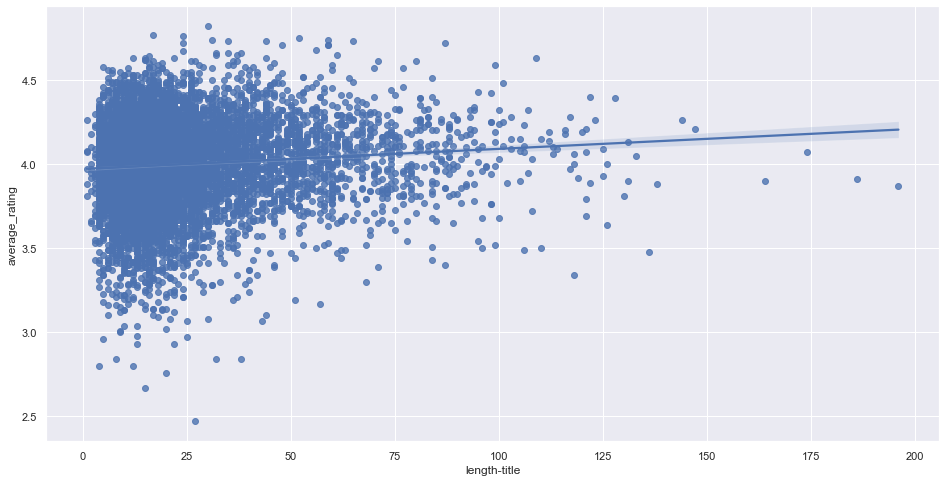

In [75]:
plt.figure(figsize=(16,8))
sns.regplot(x=dtf_products['length-title'], y=dtf_products['average_rating'])

So, the highly rated books have rather short titles. The graph shows that a straight line can be plotted but very approximately to say that as the length of title increases, the rating remains constant (at around 4).